In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Key Observation:

1. Categorical Column:
    'Name','Ticket','Cabin','Embarked'
    
2. Numerical Column:
    'PassengerID','Survived','Pclass','Age','SibSp','Parch','Fare'

<AxesSubplot:>

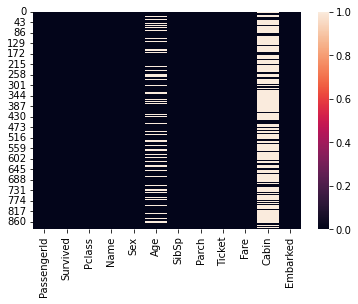

In [5]:
sns.heatmap(df.isnull())

we can see that 'Age' and 'Cabin' have large number of Null values

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

'Age','Cabin','Embarked' have null values

In [7]:
collist = df.columns.values

for i in collist:
    print("Unique value of ",i,"is ",df[i].unique(),'\n')

Unique value of  PassengerId is  [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 2

In [8]:
cols = df.columns
num_cols = df._get_numeric_data().columns

non_numeric_cols = list(set(cols)-set(num_cols))
non_numeric_cols

['Embarked', 'Cabin', 'Name', 'Sex', 'Ticket']

In [9]:
df['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [10]:
df['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'].fillna('S',inplace=True)

In [13]:
df['Age'].replace(np.NaN,df['Age'].mean(),inplace=True)

In [14]:
df['Cabin'].replace(np.NaN,df['Cabin'].mode,inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Now we have removed all null values

we can convert 'Sex' and 'Embarked' column to numeric values

In [16]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Embarked = df.Embarked.astype('str')
df.Embarked = le.fit_transform(df.Embarked)
df.Sex = le.fit_transform(df.Sex)


Now we will drop 'PassengerID','Name','Ticket' column as it has no effect with our target variable

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int32  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(3)
memory usage: 76.7+ KB


In [18]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [19]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


# Key Observation:

Columns 'Age','SibSp','Parch','Fare' have large difference between 75% and max value which means outliers are present.

Columns 'Age','Fare' also shows that skewness is present in data

# Correlation:

In [20]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


<AxesSubplot:>

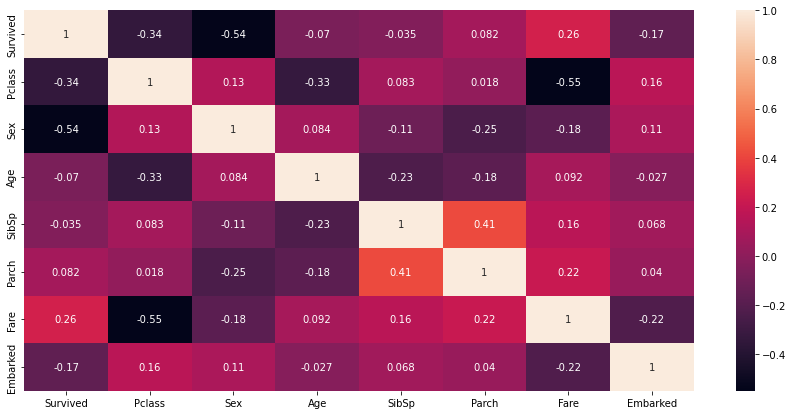

In [21]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)

# Key Observations:

We can see that 'PClass' is strongly correlated with 'Sex'

Positive Correlated with Target Variable:
    
    'Parch','Fare'
    
Negatively Correlated with Target Variable:
    
    'Pclass','Age','Sex','SibSp','Embarked'
    

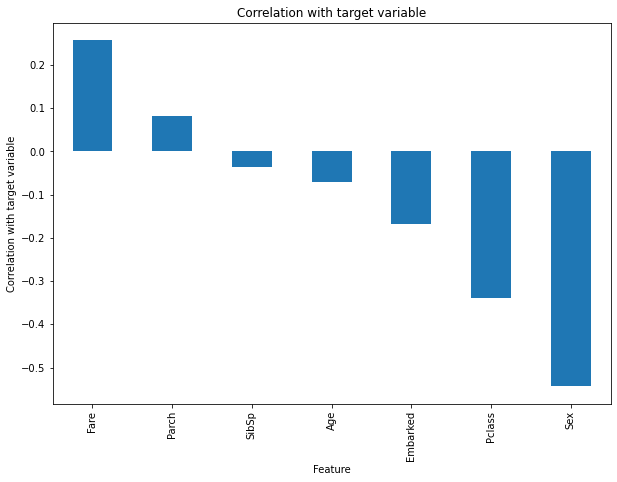

In [22]:
plt.figure(figsize=(10,7))
df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot.bar()
plt.xlabel("Feature")
plt.ylabel("Correlation with target variable")
plt.title("Correlation with target variable")
plt.show()

Target Variable 'Survived' is highly negative correlated with 'Sex'.

# Visualization

<AxesSubplot:xlabel='Survived', ylabel='count'>

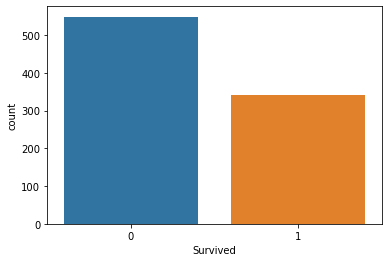

In [44]:
sns.countplot(x='Survived',data=df)

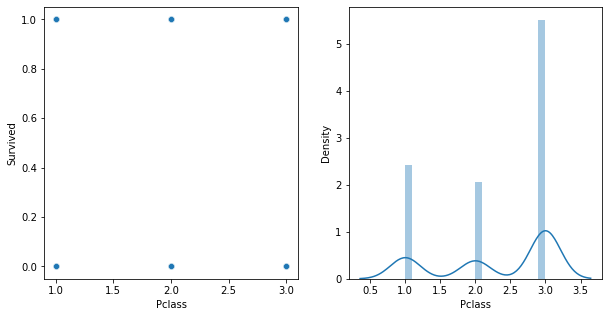

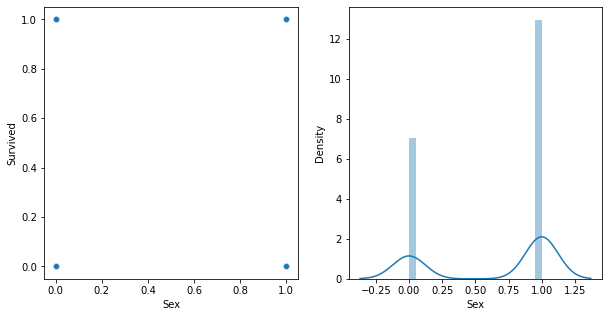

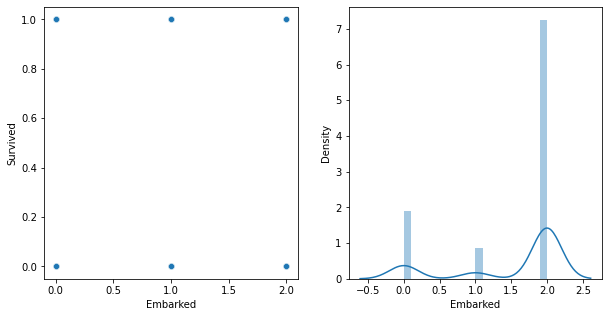

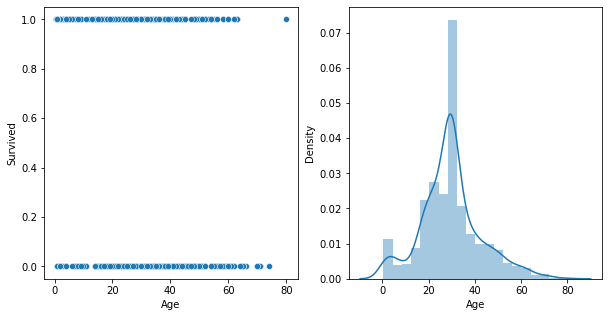

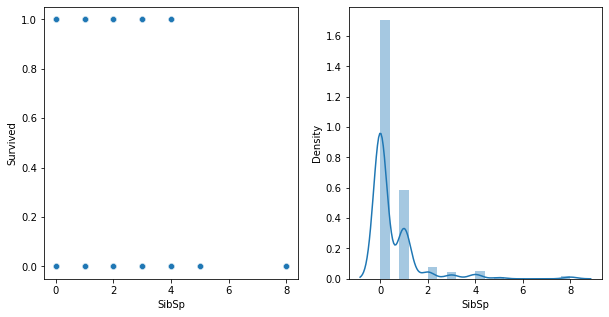

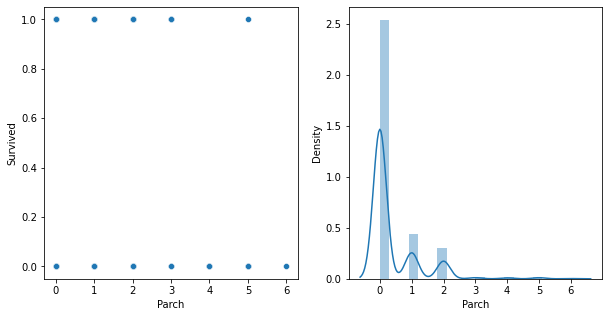

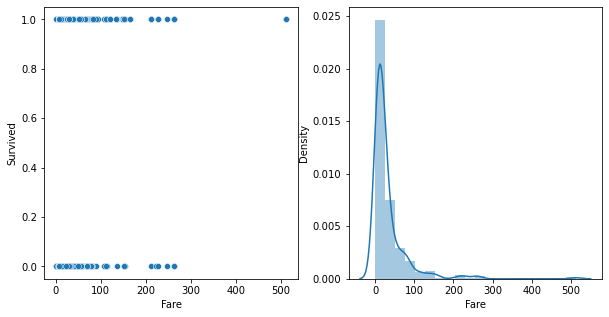

In [23]:
target_variable = "Survived"
feature_variable = ['Pclass','Sex','Embarked','Age','SibSp','Parch','Fare']

def num_plots(feature_name):
    fig,axes = plt.subplots(1,2,figsize=(10,5))
    sns.scatterplot(data=df,x=feature_name,y=target_variable,ax = axes[0])
    sns.distplot(df[feature_name],bins=20,kde=True,ax=axes[1])
    plt.show()

for i in feature_variable:
    num_plots(i)

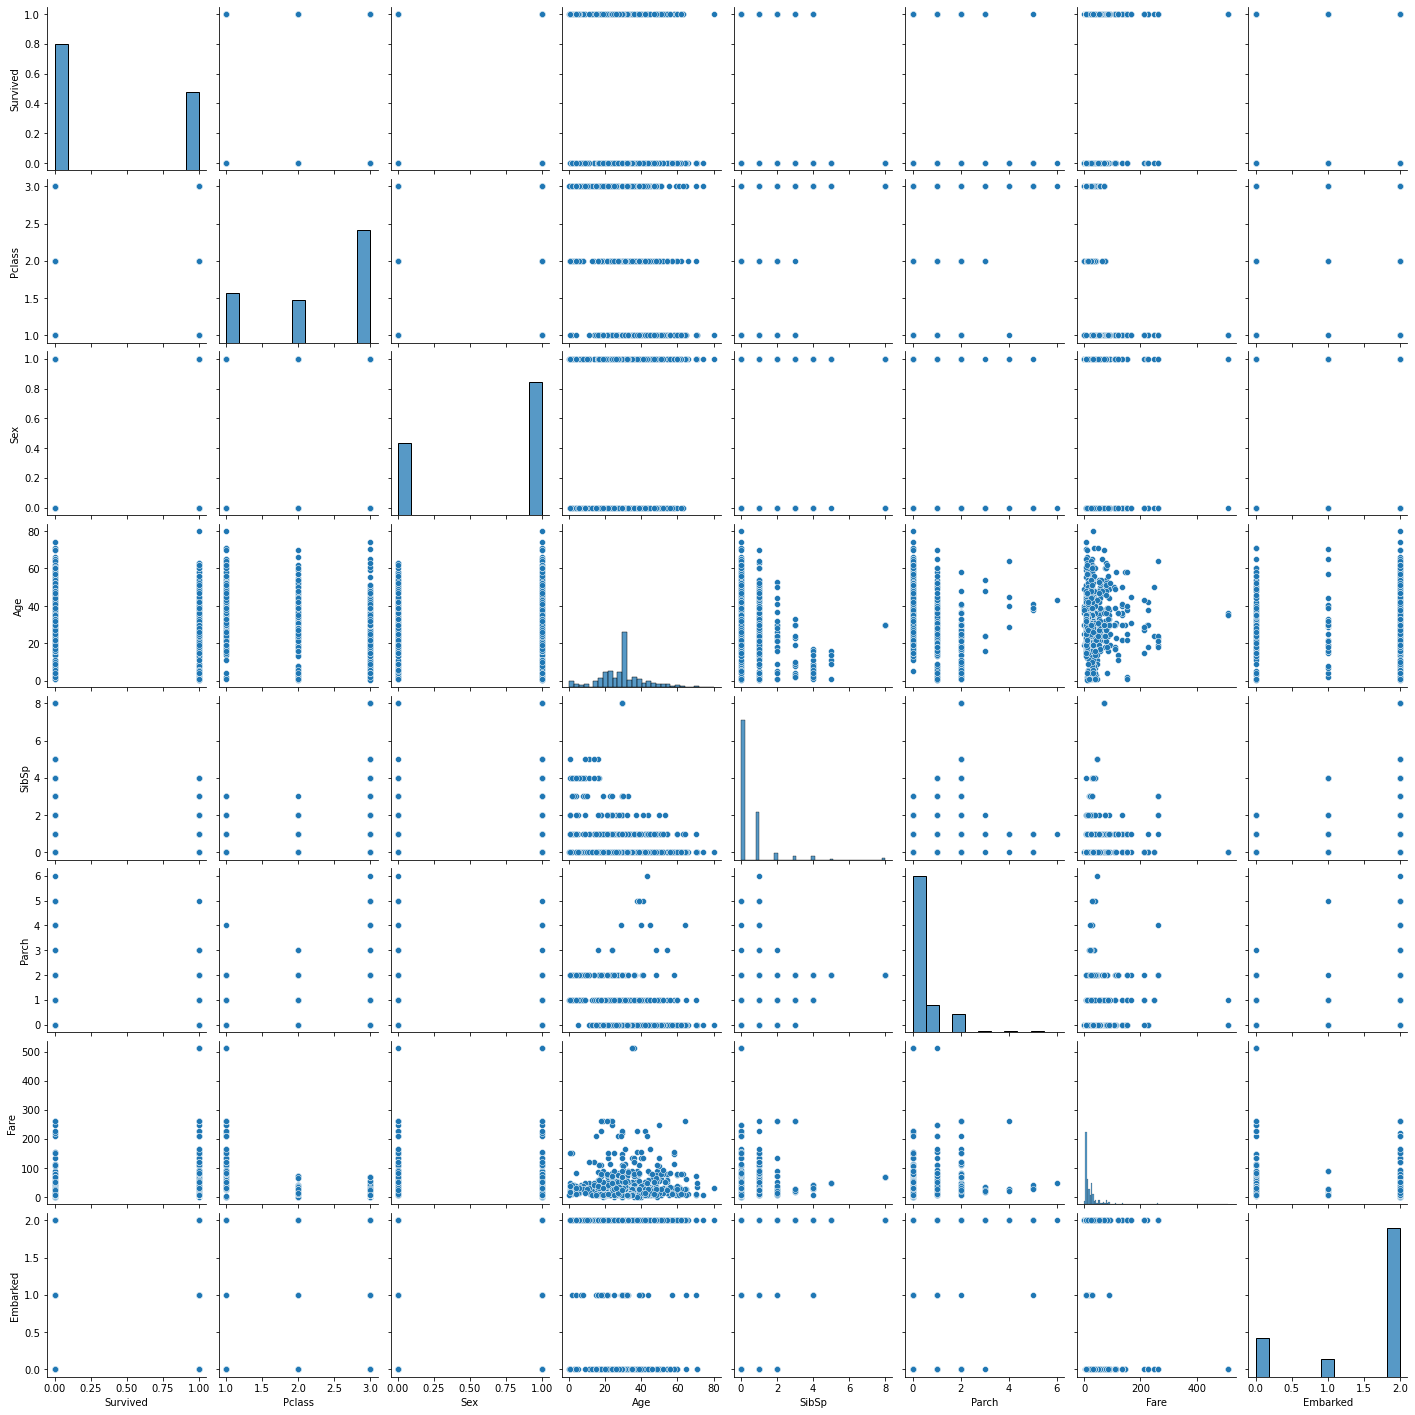

In [24]:
sns.pairplot(df)

In [25]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [26]:
x.shape

(891, 7)

In [27]:
y.shape

(891,)

# Outliers:

Survived       AxesSubplot(0.125,0.657941;0.227941x0.222059)
Pclass      AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Sex         AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Age            AxesSubplot(0.125,0.391471;0.227941x0.222059)
SibSp       AxesSubplot(0.398529,0.391471;0.227941x0.222059)
Parch       AxesSubplot(0.672059,0.391471;0.227941x0.222059)
Fare              AxesSubplot(0.125,0.125;0.227941x0.222059)
Embarked       AxesSubplot(0.398529,0.125;0.227941x0.222059)
dtype: object

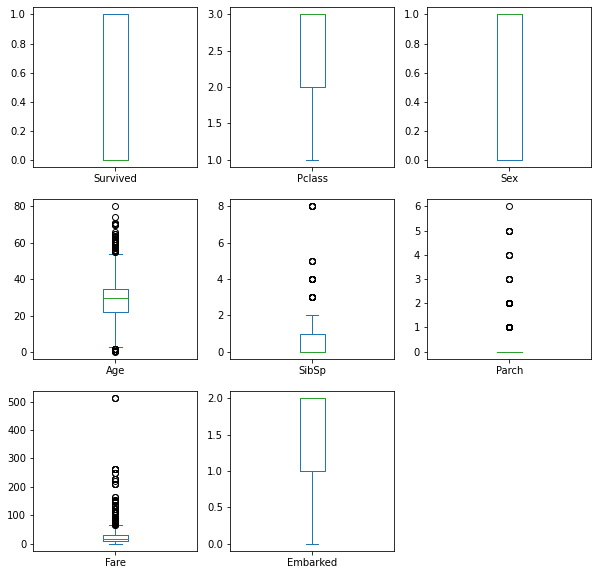

In [28]:
df.plot(kind='box',subplots=True,layout=(3,3),figsize=(10,10))

 We can see that Outliers are present in 'Age','SibSp','Parch','Fare' columns

# Removing Outliers

In [29]:
from scipy.stats import zscore
z = np.abs(zscore(x))
threshold = 3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [30]:
x_new = x[(z<3).all(axis=1)]
x_new.shape

(820, 7)

In [31]:
print("Old DataFrame : ",x.shape)
print("New DataFrame : ",x_new.shape)
print("Total rows dropped : ",x.shape[0]-x_new.shape[0])

Old DataFrame :  (891, 7)
New DataFrame :  (820, 7)
Total rows dropped :  71


# Percentage Loss


In [32]:
percentage_loss = (891-820)/891*100
percentage_loss

7.968574635241302

There is 7% data loss, so we can remove outliers

# Skewness

In [33]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -1.264823
dtype: float64

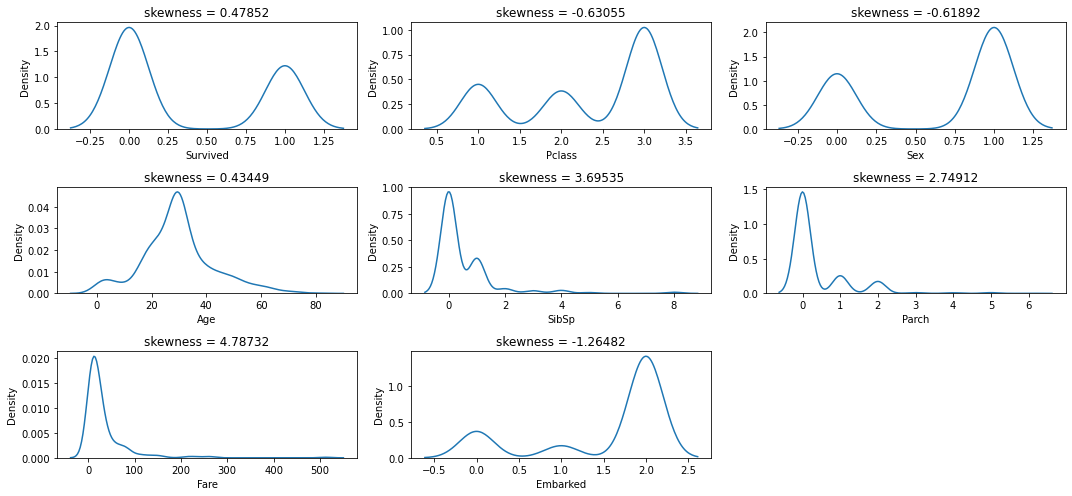

In [34]:
plt.figure(figsize=(15,7))
collist = df.columns.values
for i in range(0,len(collist)):
    plt.subplot(3,3,i+1)
    sns.kdeplot(df[collist[i]])
    plt.title(f"skewness = {round(df[collist[i]].skew(),5)}")
    plt.tight_layout()

We can see skewness is present in almost all columns

# Removing Skewness

In [35]:
from sklearn.preprocessing import power_transform
X = power_transform(x,method='yeo-johnson')
X

array([[-0.78927234,  0.86397329,  0.73769513, ...,  1.37363642,
        -0.56025296, -0.87882001],
       [ 1.2669898 , -1.45912855, -1.35557354, ...,  1.37363642,
        -0.56025296,  1.33665056],
       [ 1.2669898 ,  0.86397329, -1.35557354, ..., -0.67984996,
        -0.56025296, -0.79006485],
       ...,
       [-0.78927234,  0.86397329, -1.35557354, ...,  1.37363642,
         1.84685634,  0.28888536],
       [ 1.2669898 , -1.45912855,  0.73769513, ..., -0.67984996,
        -0.56025296,  0.52790578],
       [-0.78927234,  0.86397329,  0.73769513, ..., -0.67984996,
        -0.56025296, -0.81234947]])

In [36]:
pd.DataFrame(X).skew().sort_values(ascending=False)

5    1.228795
4    0.808608
0    0.478523
3    0.064420
6   -0.040329
1   -0.441438
2   -0.618921
dtype: float64

In [37]:
x = pd.DataFrame((X),columns=x.columns)

# Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)


# Training the Model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

acc = 0

acc = 0
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=i,test_size=.22)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred = lr.predict(x_test)
    temp = accuracy_score(y_test,y_pred)
    if temp > acc:
        acc = temp
        best_rstate = i
print("Accuracy : ",acc,"Random State : ",best_rstate)

Accuracy :  0.8121827411167513 Random State :  244


In [40]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

gnb = GaussianNB()
svc = SVC()
kn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
ad = AdaBoostClassifier()

model = [gnb,svc,kn,dt,rf,ad]

In [41]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy Score of ",m,"is :",accuracy_score(y_test,predm))
    print("Mean Absolute error : ",mean_absolute_error(y_test,predm))
    print("Mean Squared Error : ",mean_squared_error(y_test,predm))
    print("r2_score : ",r2_score(y_test,predm))
    
    
    print("Confusion Matrix of is : ",confusion_matrix(y_test,predm))
    print("Classification Report is : ",classification_report(y_test,predm))
    print("\n")
    
    

Accuracy Score of  GaussianNB() is : 0.4720812182741117
Mean Absolute error :  0.6649746192893401
Mean Squared Error :  0.9390862944162437
r2_score :  -0.5869110859531483
Confusion Matrix of is :  [[11 12 11]
 [ 1 10  8]
 [16 56 72]]
Classification Report is :                precision    recall  f1-score   support

           0       0.39      0.32      0.35        34
           1       0.13      0.53      0.21        19
           2       0.79      0.50      0.61       144

    accuracy                           0.47       197
   macro avg       0.44      0.45      0.39       197
weighted avg       0.66      0.47      0.53       197



Accuracy Score of  SVC() is : 0.7208121827411168
Mean Absolute error :  0.45685279187817257
Mean Squared Error :  0.8121827411167513
r2_score :  -0.37246364190542547
Confusion Matrix of is :  [[  1   0  33]
 [  0   2  17]
 [  2   3 139]]
Classification Report is :                precision    recall  f1-score   support

           0       0.33      0.03 

we are getting accuracy of 84 with DecisionTreeClassifier.

Further we can tune our model

# Hypertuning

In [67]:
from sklearn.model_selection import GridSearchCV

tree_para = {'criterion':['gini','entropy'],
            'max_depth': [4,5,6,7,8]}

GCV = GridSearchCV(DecisionTreeClassifier(),tree_para,cv=5)
GCV.fit(x_train,y_train)
GCV.best_estimator_

DecisionTreeClassifier(max_depth=8)

# Saving best model

In [73]:
import joblib
joblib.dump(dt,"Titanic_Train.pkl")

['Titanic_Train.pkl']